
# Comprehensive Analysis of Sleep Quality

---

1. **Tools Used** : Google Colab
2. **Languages** : Pyhton
3. **LIbraries** used:

     *   Pandas
     *   Numpy
     *   Matplotlib
     *   Seaborn
     *   Scipy
     *   Sklearn

4. **Objective**:

The objective of this project is to comprehensively analyze the factors influencing Quality of Sleep across various demographic, occupational, and lifestyle groups using a combination of Exploratory Data Analysis (EDA), multivariate analysis, and categorical analysis. By identifying trends, relationships, and key predictors of sleep quality, the project aims to:
- Understand Sleep Patterns: Explore how factors such as occupation, stress levels, physical activity, BMI category, and gender impact sleep quality.
- Predict Future Trends: Build regression models to predict sleep quality for various groups and assess potential changes in the future.
- Address Variability: Investigate group-specific trends and disparities (e.g., occupation-based differences in sleep quality).
- Enhance Insights: Use statistical tests and machine learning techniques to extract actionable insights and identify key variables affecting sleep quality.

The findings aim to provide data-driven insights that can inform interventions, policy-making, and lifestyle recommendations for improved sleep health.

5. **DataSet Information:**
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).


[Link to DataSet](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)








                 
                      
                                  

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''Link to the Dataset :
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
'''

#Load Dataset
df=pd.read_csv('/content/drive/MyDrive/STATS (Honors)/Sleep_health_and_lifestyle_dataset.csv');
print(df.head(2))
print("Shape of Data:",df.shape)

#No. of Nan in each Column
nan_counts = df.isna().sum()
print(nan_counts)

   Person ID Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
0          1   Male   27  Software Engineer             6.1                 6   
1          2   Male   28             Doctor             6.2                 6   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200            NaN  
1          75        10000            NaN  
Shape of Data: (374, 13)
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Diso

Only Sleep Disorder have NAN indicating there is no sleep disorder present. Hence replacing NAN with None


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [ ]:
#Replacing Normal Weight to Normal Catogory
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

# Exploratory Data Analysis

Summary of numerical data:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25% 

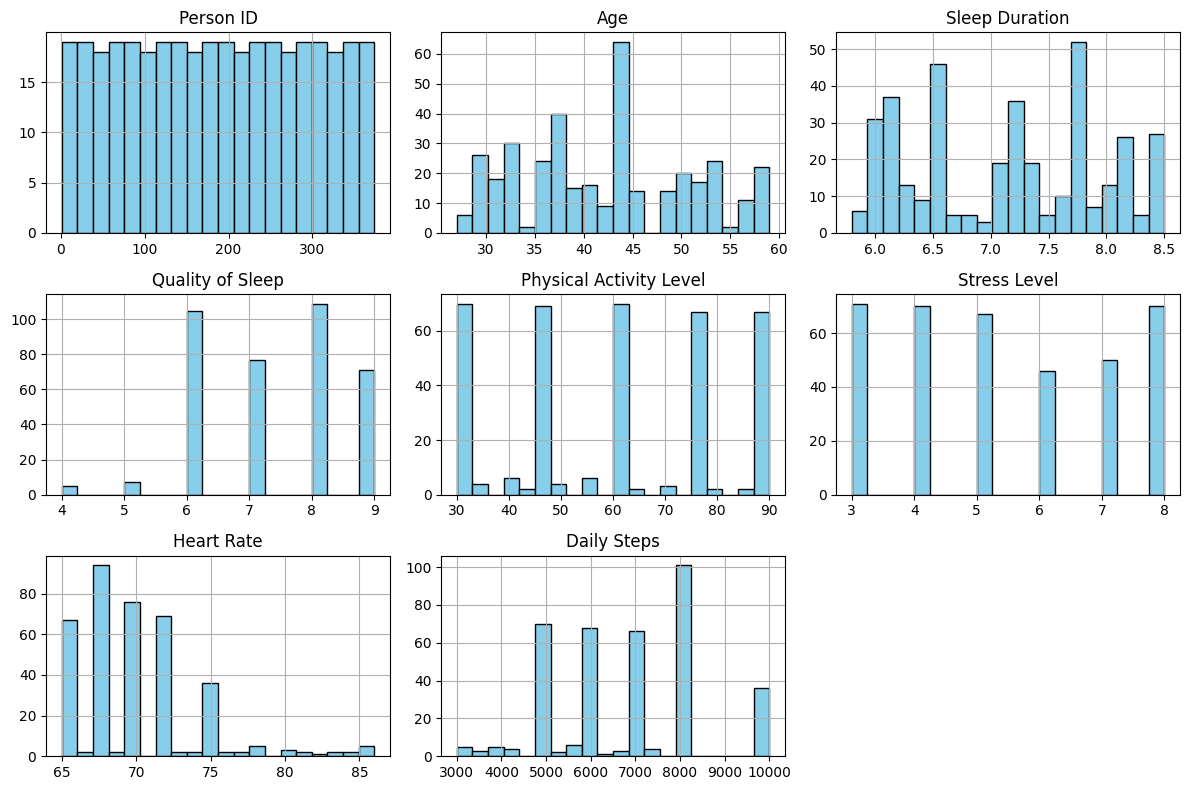


Person ID Statistics:
Skewness: 0.0
Kurtosis: -1.2000171581769437
Variance: 11687.5
Standard Deviation: 108.10874155219827

Age Statistics:
Skewness: 0.2572221422742844
Kurtosis: -0.9136621621229946
Variance: 75.22324411119547
Standard Deviation: 8.67313346554724

Sleep Duration Statistics:
Skewness: 0.037554389846484834
Kurtosis: -1.2853712176092147
Variance: 0.6330696334102736
Standard Deviation: 0.7956567308898188

Quality of Sleep Statistics:
Skewness: -0.20744763173836073
Kurtosis: -0.7543092338335313
Variance: 1.4327034737853186
Standard Deviation: 1.1969559197336044

Physical Activity Level Statistics:
Skewness: 0.07448690272010197
Kurtosis: -1.265204971116588
Variance: 433.9223810411322
Standard Deviation: 20.830803658071673

Stress Level Statistics:
Skewness: 0.15432958161578225
Kurtosis: -1.325628122065808
Variance: 3.1489441011598314
Standard Deviation: 1.7745264441985167

Heart Rate Statistics:
Skewness: 1.2248235470533522
Kurtosis: 2.240001297802327
Variance: 17.103812131

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

#Numerical Data Anlysis
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Display summary
print("Summary of numerical data:")
print(numerical_data.describe())

# Plot histograms for each numerical column
numerical_data.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Calculate skewness, kurtosis, variance, and standard deviation
for column in numerical_data.columns:
    print(f"\n{column} Statistics:")
    print(f"Skewness: {numerical_data[column].skew()}")
    print(f"Kurtosis: {kurtosis(numerical_data[column])}")
    print(f"Variance: {numerical_data[column].var()}")
    print(f"Standard Deviation: {numerical_data[column].std()}")


Observations:

*   Most of the numerical data (except for "Heart Rate" and "Daily Steps") show moderate to low skewness, with more symmetric distributions.

*   The variance and standard deviation values suggest that, while there is variation in the data (particularly in "Person ID," "Heart Rate," and "Daily Steps"), the dataset is not extremely dispersed in most cases.

*   Heart Rate and Daily Steps show notable variability, with heart rates being more peaked and daily steps more spread out.






# Multivariate Data Analysis

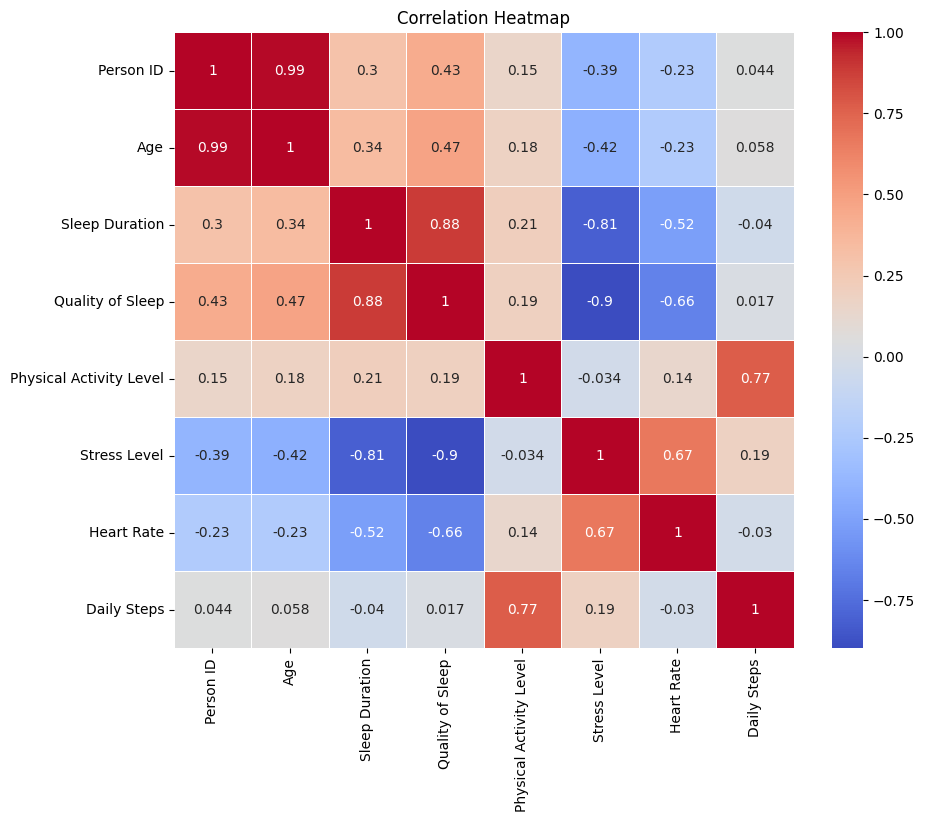

In [ ]:
#Corrlation
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Observations:


*  Sleep Duration and Quality are strongly linked, with longer sleep often leading to better quality sleep.
*   Stress has a negative impact on both Sleep Duration and Quality of Sleep, with higher stress leading to less sleep and worse quality.
*  Physical Activity Level and Daily Steps are strongly correlated, indicating that people who are more physically active tend to accumulate more steps.
*   The relationship between Heart Rate and other variables suggests that it may be influenced more by stress levels and less by sleep or physical activity.



In [ ]:
# Multilinear Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Heart Rate', 'Age']]
y = df['Quality of Sleep']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)

Mean Squared Error: 0.12973372675717285
R-squared: 0.9140051599093687

Model Coefficients:
                         Coefficient
Sleep Duration              0.642969
Stress Level               -0.280201
Physical Activity Level     0.005527
Heart Rate                 -0.039616
Age                         0.014145


In [ ]:
#Feature Selection using Filter Method: Information Gain
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns)
print("Information Gain (Mutual Information) for each feature:")
print(mi_series.sort_values(ascending=False))

# Select top 3 features based on Information Gain
selected_features_info_gain = mi_series.nlargest(2).index
print("\nSelected Features based on Information Gain:", selected_features_info_gain)

# Train a model with selected features based on Information Gain
X_selected_info_gain = X[selected_features_info_gain]
X_train, X_test, y_train, y_test = train_test_split(X_selected_info_gain, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_info_gain = model.predict(X_test)

# Evaluate performance for Information Gain based model
mse_info_gain = mean_squared_error(y_test, y_pred_info_gain)
r2_info_gain = r2_score(y_test, y_pred_info_gain)
print(f"Information Gain - MSE: {mse_info_gain}, R-squared: {r2_info_gain}")

Information Gain (Mutual Information) for each feature:
Sleep Duration             1.143192
Stress Level               1.027992
Age                        0.897473
Physical Activity Level    0.698497
Heart Rate                 0.646249
dtype: float64

Selected Features based on Information Gain: Index(['Sleep Duration', 'Stress Level'], dtype='object')
Information Gain - MSE: 0.20016087826391746, R-squared: 0.8673220669061353


In [ ]:
#Feature Selection using Wrapper Method: Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=None)
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_]
print("\nSelected Features based on RFE:", selected_features_rfe)

# Train a model with selected features based on RFE
X_selected_rfe = X[selected_features_rfe]
X_train, X_test, y_train, y_test = train_test_split(X_selected_rfe, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred_rfe = model.predict(X_test)

# Evaluate performance for RFE based model
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)
print(f"RFE - MSE: {mse_rfe}, R-squared: {r2_rfe}")


Selected Features based on RFE: Index(['Sleep Duration', 'Stress Level'], dtype='object')
RFE - MSE: 0.20016087826391746, R-squared: 0.8673220669061353


Here the accuracy of model is dropping after selecting some specific no of features. Hence using Dimensionality Reduction technique

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and reduce to 3 components
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio of each principal component
print("Explained Variance Ratio of Each Principal Component:", pca.explained_variance_ratio_)
print("Total Explained Variance:", np.sum(pca.explained_variance_ratio_))

# Train a model with PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Evaluate performance for PCA
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)
print(f"PCA - MSE: {mse_pca}, R-squared: {r2_pca}")

Explained Variance Ratio of Each Principal Component: [0.51351619 0.23072804 0.14519402 0.08134546]
Total Explained Variance: 0.9707837079424799
PCA - MSE: 0.12954393479643056, R-squared: 0.9141309647384018


The model performance after applying PCA shows an MSE of 0.1295 and an R² of 0.9141, which suggests a strong fit to the data. The high explained variance ratio and R² indicate that PCA has effectively retained the essential information while reducing the feature space, leading to a high-performing model.

# Categorical Data Analysis

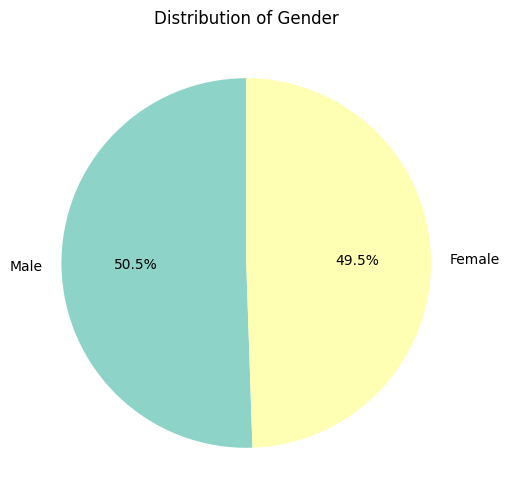

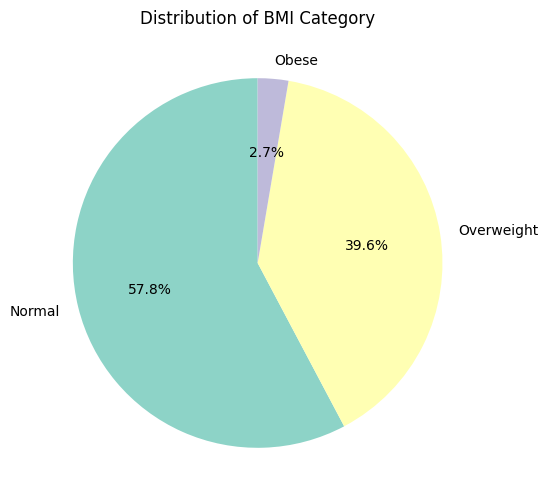

<ipython-input-14-8f4007ff3523>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Occupation', palette="Set3")


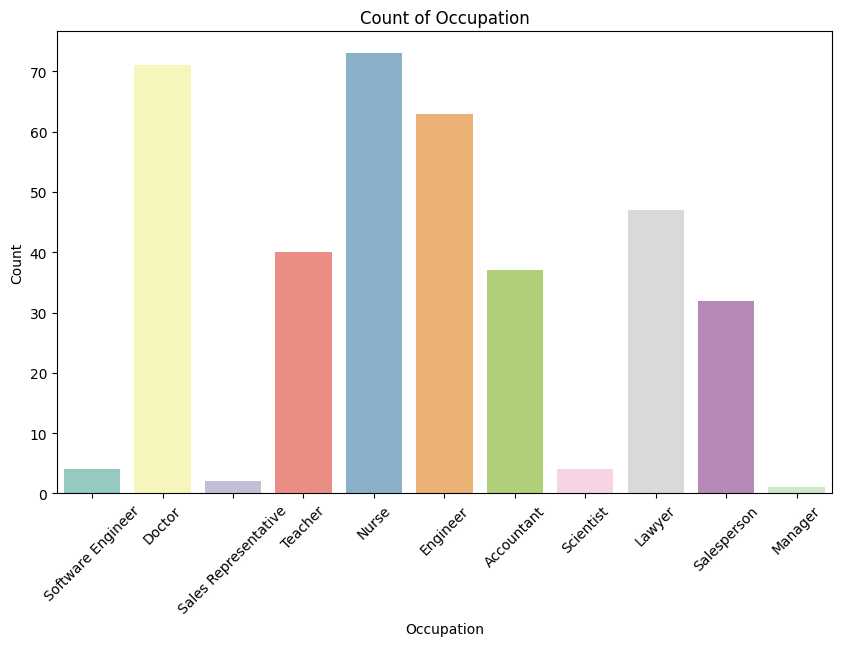

In [ ]:
#Catogorical Data Anlysis
categorical_data = ['Gender', 'Occupation', 'BMI Category']

plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(df['Gender'].unique())))
plt.title('Distribution of Gender')
plt.ylabel('')  # Hide the y-label for better visual
plt.show()

# Plot Pie Chart for BMI Category
plt.figure(figsize=(6, 6))
df['BMI Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(df['BMI Category'].unique())))
plt.title('Distribution of BMI Category')
plt.ylabel('')  # Hide the y-label for better visual
plt.show()

# Plot Bar Chart for Occupation
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occupation', palette="Set3")
plt.title('Count of Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

Observations:


*   The Gender ratio in collected Data is almost equal  
*   Most of th population falls under Normal BMI catogory
*  Data has the highest no of Nurse followed by Doctors and Engineers





### Research Q.1 : How does the Gender and BMI affects Sleep Quality?

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import pandas as pd
import numpy as np


# Chi-Square Test: Association between BMI Category and Gender
bmi_gender_table = pd.crosstab(df['BMI Category'], df['Gender'])
chi2_stat, chi2_p_value, chi2_dof, chi2_expected = chi2_contingency(bmi_gender_table)

# ANOVA: Comparing Quality of Sleep across BMI Categories
normal_sleep = df[df['BMI Category'] == 'Normal']['Quality of Sleep']
overweight_sleep = df[df['BMI Category'] == 'Overweight']['Quality of Sleep']
obese_sleep = df[df['BMI Category'] == 'Obese']['Quality of Sleep']

anova_stat, anova_p_value = f_oneway(normal_sleep, overweight_sleep, obese_sleep)

chi_square_results = {
    "Chi2-statistic": chi2_stat,
    "p-value": chi2_p_value,
    "Degrees of Freedom": chi2_dof
}

anova_results = {
    "F-statistic": anova_stat,
    "p-value": anova_p_value
}

chi_square_results, anova_results


({'Chi2-statistic': 50.7053616293256,
  'p-value': 9.760467523402989e-12,
  'Degrees of Freedom': 2},
 {'F-statistic': 22.01139140051275, 'p-value': 9.257968894758679e-10})

Interpretation of Results:

1. Chi-Square Test (Association between BMI Category and Gender):
   - Chi2-statistic: 50.71  
   - p-value: \( 9.76 \times 10^{-12} \) (very small, below 0.05 threshold)  
   - Degrees of Freedom: 2  

   **Conclusion**:  
   There is a statistically significant association between BMI Category and Gender italicized text. This suggests that the distribution of genders differs across BMI categories
---

2. ANOVA (Comparison of Quality of Sleep across BMI Categories):
   - F-statistic: 22.01  
   - p-value: \( 9.26 \times 10^{-10} \) (very small, below 0.05 threshold)  

   **Conclusion**:  
   There are statistically significant differences in **Quality of Sleep** among the three BMI categories (Normal, Overweight, Obese).

---

 Summary:
- **BMI Category and Gender** are not independent; their association is statistically significant.
- **BMI Category** significantly impacts **Quality of Sleep**, indicating differences across groups that warrant further investigation.

  BMI Category  Quality of Sleep
0       Normal          7.638889
1        Obese          6.400000
2   Overweight          6.898649
   Gender  Quality of Sleep
0  Female          7.664865
1    Male          6.968254
  BMI Category  Gender  Quality of Sleep
0       Normal  Female          8.282051
1       Normal    Male          7.275362
2        Obese  Female          7.000000
3        Obese    Male          6.333333
4   Overweight  Female          7.216981
5   Overweight    Male          6.095238


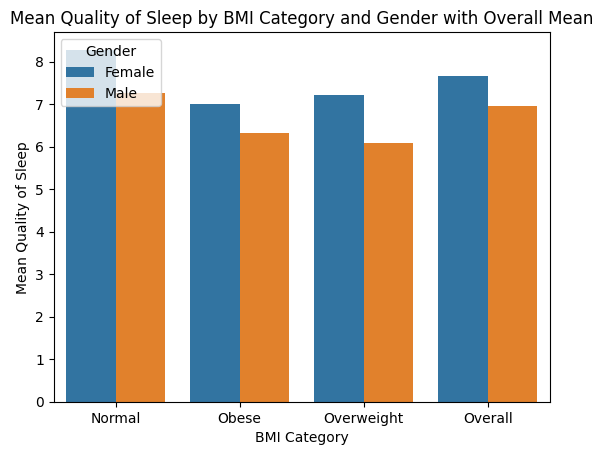

In [ ]:
#Simpson's Paradox for gender and bmi category
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by BMI Category and calculating mean Quality of Sleep
grouped_by_bmi = df.groupby('BMI Category')['Quality of Sleep'].mean().reset_index()
print(grouped_by_bmi)

# Grouping by Gender and calculating mean Quality of Sleep
grouped_by_gender = df.groupby('Gender')['Quality of Sleep'].mean().reset_index()
print(grouped_by_gender)
grouped_by_gender['BMI Category']='Overall'

# Grouping by both BMI Category and Gender to calculate mean Quality of Sleep
grouped_by_bmi_and_gender = df.groupby(['BMI Category', 'Gender'])['Quality of Sleep'].mean().reset_index()
print(grouped_by_bmi_and_gender)

combined_df= pd.concat([grouped_by_bmi_and_gender,grouped_by_gender], axis=0)

sns.barplot(x='BMI Category', y='Quality of Sleep', hue='Gender', data=combined_df, dodge=True)
plt.title("Mean Quality of Sleep by BMI Category and Gender with Overall Mean")
plt.xlabel("BMI Category")
plt.ylabel("Mean Quality of Sleep")
plt.legend(title='Gender', loc='upper left')
plt.show()

Interpretation:

Since the trends within BMI categories align with the overall gender trends, there is no evidence of Simpson's Paradox. This consistency indicates that the relationship between BMI Category and Quality of Sleep is not reversed or contradicted when analyzed by gender.

### Q.2 Which profession has better sleep quality?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

              Occupation  Predicted Quality of Sleep
0             Accountant                    7.532807
1                 Doctor                    6.623082
2               Engineer                    8.422674
3                 Lawyer                    7.627038
4                Manager                    7.097775
5                  Nurse                    7.394395
6   Sales Representative                    4.839396
7            Salesperson                    6.260697
8              Scientist                    5.579996
9      Software Engineer                    6.468138
10               Teacher                    7.305719
              Occupation  Quality of Sleep
0             Accountant          7.891892
1                 Doctor          6.647887
2               Engineer          8.412698
3                 Lawyer          7.893617
4                Manager          7.000000
5                  Nurse          7.369863
6   Sales Representative          4.000000
7            Salespe

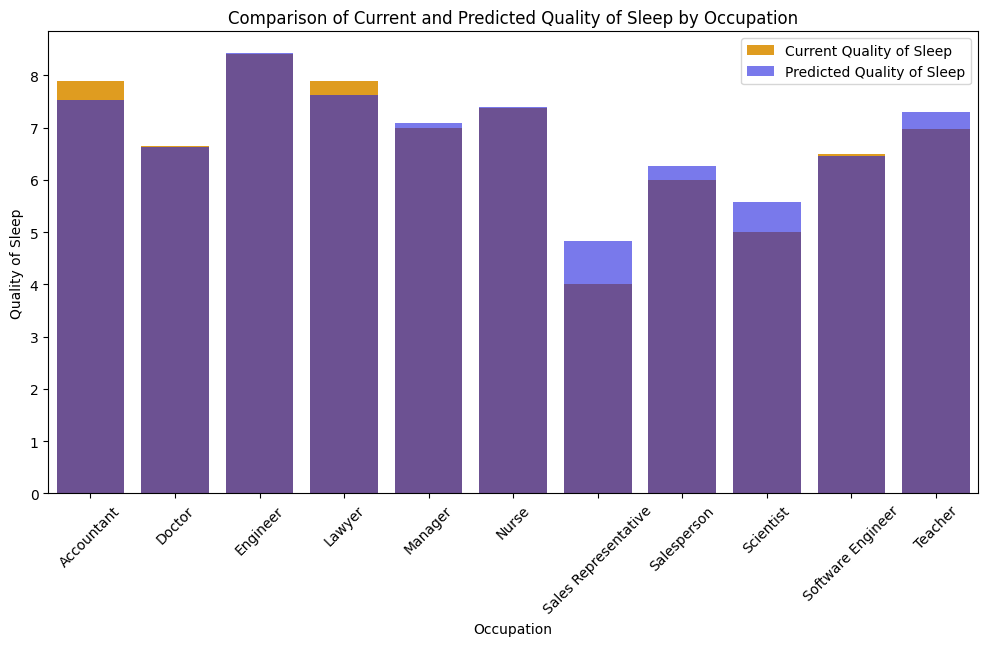

In [ ]:
# Group the data by occupation and calculate the mean for each group
occupation_grouped = df.groupby('Occupation')[['Sleep Duration','Stress Level','Physical Activity Level','Heart Rate','Age']].mean()
occupation_mean_sleep_quality = df.groupby('Occupation')['Quality of Sleep'].mean().reset_index()


occupation_predictions = []

# Loop through each occupation and make predictions using the model
for occupation in occupation_grouped.index:
    # Get the mean values for the current occupation
    occupation_data = occupation_grouped.loc[occupation]

    # Prepare the data for prediction: mean values of each feature
    occupation_input = occupation_data[['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Heart Rate', 'Age']].values.reshape(1, -1)

    # Predict using the trained model
    predicted_sleep_quality = model.predict(occupation_input)

    # Store the prediction along with the occupation
    occupation_predictions.append((occupation, predicted_sleep_quality[0]))

# Convert predictions into a DataFrame for easy visualization
predictions_df = pd.DataFrame(occupation_predictions, columns=['Occupation', 'Predicted Quality of Sleep'])

# Print the predictions
print(predictions_df)
print(occupation_mean_sleep_quality)

plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Quality of Sleep', data=occupation_mean_sleep_quality, color='orange', label='Current Quality of Sleep')
sns.barplot(x='Occupation', y='Predicted Quality of Sleep', data=predictions_df, color='blue', alpha=0.6, label='Predicted Quality of Sleep')

plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')
plt.title('Comparison of Current and Predicted Quality of Sleep by Occupation')
plt.xticks(rotation=45)
plt.legend()
plt.show()
